In [6]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e9/43/93ea65227c938a0a4a8925d7f054b050ea743044b887170da9eca210635a/yfinance-0.2.28-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.28-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached lxml-4.9.3.tar.gz (3.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached frozendict-2.3.8-cp38-cp38-macosx_10_9_x86_64.whl (35 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached soupsieve-2.4.1-py3-none-any.whl (36 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
Using cached yfinance-0.2.28-py2.py3-none-any.whl (65 kB)
  Created wheel for lxml: filename=lxml-4.9.3-cp38-cp38-macosx_10_9_x86_64.whl size=1860731 sha256=e17508c93a1965f369735ff2badb677a67b77ad812796552ec54

In [7]:
import pandas as pd
import yfinance as yf

In [10]:
apple = yf.Ticker("AAPL")


In [98]:
prices = yf.download("GE", start="2022-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


In [19]:
prices['Adj Close'].pct_change()[:5].dropna()

Date
2022-01-04   -0.012692
2022-01-05   -0.026600
2022-01-06   -0.016693
2022-01-07    0.000988
Name: Adj Close, dtype: float64

In [30]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b2/b6/c6596fbc30899e6da31450053054d7da61a21a3f510544fb7cb7658a3de3/matplotlib-3.7.2-cp38-cp38-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ff/dd/5d44bc3a5993c25b75b7aef4f810ebd74ef9057dd2a4eab37eba240ee401/contourpy-1.1.0-cp38-cp38-macosx_10_9_x86_64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/52/51/147c24a058779345d22e828391830db64e37afec205ca53a37ff3b65f961/fonttools-4.42.1-cp38-cp38-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/ca/78/2bff6dbedc619a614871005c32f106f24c3366e1025afff0fdfc2b56b7c8/kiwisolver

In [31]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

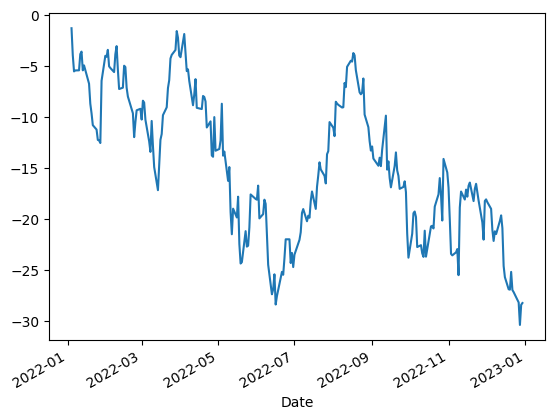

In [37]:
(100* (1 + prices['Adj Close'].pct_change().dropna()).cumprod() -100).plot()

In [25]:
prices['Adj Close'].iloc[0]*.9873

170.96433950383758

In [39]:
(prices['Adj Close'].iloc[-1] - prices['Adj Close'].iloc[0] ) / prices['Adj Close'].iloc[0]

-0.2819950385278341

In [33]:
def backtest_return(pct_growth):
    return (1 + pct_growth).cumprod() -1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904068,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171844,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400


In [ ]:
def sharpe_ratio(returns, risk_free_rate=0):
    mean_returns = returns.mean()
    std_returns = returns.std()
    return (mean_returns - risk_free_rate) / std_returns

In [40]:
import numpy as np

In [42]:
return_mean = prices['Adj Close'].pct_change().mean()
return_std = prices['Adj Close'].pct_change().std()

In [43]:
random_return = np.random.normal(return_mean, return_std)

In [44]:
random_return

-0.02051677984195041

In [46]:
!pip install scipy

  Using cached scipy-1.10.1-cp38-cp38-macosx_10_9_x86_64.whl (35.0 MB)


In [47]:
from scipy.stats import skew, kurtosis

In [50]:
skew(prices['Adj Close'].pct_change().dropna())

0.3241065173013118

In [100]:
rolling_mean = prices['Adj Close'].pct_change().dropna().rolling(20).mean()

In [101]:
def exit_pos(df, start_date, end_date):
    return (df.loc[end_date] - df.loc[start_date])/df.loc[start_date]


In [66]:
exit_pos(prices['Adj Close'],'2022-1-3','2022-1-10')

-0.05395294011048358

In [102]:
prices['Adj Close'].pct_change().dropna()[prices['Adj Close'].pct_change().dropna() > rolling_mean].mean()

0.014224385543832532

In [103]:
def sharpe_ratio(returns, risk_free_rate=0):
    mean_returns = returns.mean()
    std_returns = returns.std()
    return ((mean_returns - risk_free_rate) / std_returns) 

In [104]:
sr = sharpe_ratio(prices['Adj Close'].pct_change().dropna()[prices['Adj Close'].pct_change().dropna() > rolling_mean])

In [105]:
def sharpe_ratio_annual(returns, risk_free_rate=0):
    mean_returns = returns.mean()
    std_returns = returns.std()
    print(returns.mean(),std_returns)
    return ((mean_returns - risk_free_rate) / std_returns) * (252**.5)

In [106]:
sharpe_ratio_annual(prices['Adj Close'].pct_change().dropna()[prices['Adj Close'].pct_change().dropna() > rolling_mean])

0.014224385543832532 0.014368846275072828


15.714909595896161

In [107]:
import scipy.stats as stats


In [108]:
def prob_sharp_ratio(returns, sr):
    """
    returns the confidence of a sharpe ratio (https://deliverypdf.ssrn.com/delivery.php?ID=095121121119088095084100064092071078040064035059032043111084086103027019067090096119120010051124040104010080107112121121080011038022029046084099121030106065014094028020094066086067008085092101098122091100068029065071091100030115079080005080070114093&EXT=pdf&INDEX=TRUE)
    """
    skewness = skew(returns)
    kert = kurtosis(returns)
    return stats.norm.cdf((sr*((len(returns)-1)**.5) / (1+.5*sr**2 - skewness*sr+ .25*(kert-3)* sr**2)**.5))

In [111]:
prob_sharp_ratio(prices['Adj Close'].pct_change().dropna()[prices['Adj Close'].pct_change().dropna() > rolling_mean],sr)

/var/folders/f8/3psql8bs4kv1w3gbnjvh4w500000gn/T/ipykernel_30526/19897340.py:7: RuntimeWarning: invalid value encountered in scalar power
  return stats.norm.cdf((sr*((len(returns)-1)**.5) / (1+.5*sr**2 - skewness*sr+ .25*(kert-3)* sr**2)**.5))


nan

In [110]:
prices['Adj Close'].pct_change().dropna()[prices['Adj Close'].pct_change().dropna()>rolling_mean]

Date
2022-02-01    0.036727
2022-02-02    0.000919
2022-02-03    0.002856
2022-02-04    0.007018
2022-02-07    0.008989
                ...   
2022-12-21    0.032989
2022-12-23    0.000245
2022-12-27    0.012838
2022-12-29    0.021715
2022-12-30    0.000478
Name: Adj Close, Length: 121, dtype: float64

In [112]:
prices['Adj Close'].pct_change().dropna()

Date
2022-01-04    0.032523
2022-01-05    0.000000
2022-01-06    0.005837
2022-01-07    0.014507
2022-01-10   -0.019527
                ...   
2022-12-23    0.000245
2022-12-27    0.012838
2022-12-28   -0.010502
2022-12-29    0.021715
2022-12-30    0.000478
Name: Adj Close, Length: 250, dtype: float64

In [114]:
rolling_mean.dropna()

Date
2022-02-01    0.001144
2022-02-02   -0.000436
2022-02-03   -0.000294
2022-02-04   -0.000235
2022-02-07   -0.000511
                ...   
2022-12-23   -0.003509
2022-12-27   -0.001353
2022-12-28   -0.001989
2022-12-29   -0.001084
2022-12-30   -0.000647
Name: Adj Close, Length: 231, dtype: float64